# TWITTER SENTIMENT ANALYSIS
Twitter is one of the most popular microblogging sites. Twitter users create “tweets” (status messages) about different topics based on their opinion. The purpose of this project is to automatically analyse the sentiment (positive or negative) of tweet. This is very useful because it allows feedback to aggregate without manual intervention.  
• Organizations can also use this to gather critical feedback about problems in newly released products.

• Marketers can use this to research public opinion of their company and products, or to analyse customer satisfaction. 

• Consumers can use sentiment analysis to research products or services before making a purchase. 

###  CONNECTING TO TWITTER VIA TWEEPY OAUTH

Connecting to the twitter API using tweepy (twitter for python). Tweepy supports accessing Twitter via method, OAuth

In [1]:
import tweepy,twitter_text
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)
print(api)


### SEARCHING FOR AN USER INPUT QUERY 

In [2]:
query = input('Enter your Query to be analysed:')
no_queries = int(input('Enter number of queries to be analysed:'))

searched = tweepy.Cursor(api.search, q = query, lang='en').items(no_queries)

Enter your Query to be analysed:trump
Enter number of queries to be analysed:300


### CLEANING TWEETS 

Twitter “tweets” contain  mainly three parts : 

➢ Screen name : User who tweets or retweets 

➢ Text : Main message conveyed by tweet 

➢ Hashtags : Categorial tags, used to highlight content in tweet

Our analysis is basically on the text part of tweet, hashtags can also contribute to this analysis (without “#”) to some extent. Screen names are of no use because they are just user names and doesn’t depict any sentiments. So they just add on to computation and work. Here comes the need of Cleaning our tweets for better analysis. 

In [4]:
import preprocessor as p
list1 = []
for tweet in searched:
    list1.append(p.clean(tweet.text))


### CALCULATING POLARITY SCORES
To calculate Polarity, Vader Algorithm is used. The Vader Algorithm outputs sentiment scores to 4 classes of sentiments:

• neg   Negative 

• pos   Positive

• neu   Neutral

• Compound : Compound 
Using these sentiment scores we can easily calculate percentage classification of Sentiment on tweets fetched. 
 

In [18]:
def percent(part,whole):
    return(100* float(part)/float(whole))


positive = 0
negative = 0
neutral = 0

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
for i in list1:
    ss = sid.polarity_scores(i)
    #print(ss)
    negative +=ss['neg']
    neutral +=ss['neu']
    positive +=ss['pos']
    

    
    
positive = round(percent(positive,no_queries),2)
negative = round(percent(negative,no_queries),2)
neutral = round(percent(neutral,no_queries),2)



print(positive,'%'+' positive')
print(negative,'%'+' negative')
print(neutral,'%'+' neutral')

9.38 % positive
10.15 % negative
80.13 % neutral


###  Visual Interpretation of Analysis 

To visually interpret our sentiment analysis, we will further use Matplotlib library of Python for plotting a Pie Chart, that diagrammatically shows people opinion on the searched query. 

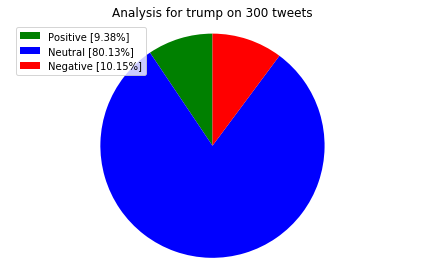

None


In [7]:
from matplotlib import pyplot as plt

labels = ['Positive ['+str(positive)+'%]','Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive,neutral,negative]
colors = ['green','blue','red']
patches,texts  =plt.pie(sizes,colors = colors,startangle=90)
plt.legend(patches,labels,loc='best')
plt.title('Analysis for '+query+' on '+str(no_queries)+' tweets')
plt.axis('equal')
plt.tight_layout()
plt.show()

### IMPORTING DATASET

Dataset twitter_samples used here contain 3 files : 

1 negative_tweets.json (Contain sample negative tweets)

2 positive_tweets,json  (Contain sample positive tweets) 

3 tweets.20150430-223406.json (Contain sample neutral tweets) 




In [8]:
from nltk.corpus import twitter_samples
twitter_samples.fileids()

negtweets = twitter_samples.strings('negative_tweets.json')
postweets = twitter_samples.strings('positive_tweets.json')

### TRAINING OUR CLASSFIER OBJECT WITH DATASET

In order to classify tweets on the basis of sentiments, we need to train a classifier using Machine learning methods. Some of popular methods are Support Vector Machines (SVM), Naive Bayes Classifier etc. Naïve Bayes Classifier being the most convenient one, is used here to train  twitter_samples (nltk corpora) 


In [10]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
import preprocessor as p

def word_feats(words):
    return dict([(word,True) for word in words])

negfeats = [(word_feats(nltk.word_tokenize(p.clean(i))),'neg') for i in negtweets]
posfeats = [(word_feats(nltk.word_tokenize(p.clean(i))),'pos') for i in postweets]
#print(negfeats)


#neg_t = word_feats(negfeats,neg_words)
#pos_t = word_feats(posfeats,pos_words)
negcutoff = int(len(negfeats)*1/2)
poscutoff = int(len(posfeats)*1/2)
trainfeats = negfeats[:negcutoff]+posfeats[:poscutoff]
testfeats = posfeats[negcutoff:]+posfeats[poscutoff:]

print("Train on %d instances, test on %d instances"%(len(trainfeats),len(testfeats)))
classifier = NaiveBayesClassifier.train(trainfeats)

Train on 5000 instances, test on 5000 instances


### CALCULATING ACCURACY OF CLASSIFIER OBJECT

In [11]:
print("Accuracy:",nltk.classify.util.accuracy(classifier,testfeats))

Accuracy: 0.7492


Train on 6666 instances , test on 3334     instances
Accuracy: 0.73125374925015

Train on 7500 instances , test on 2500     instances
Accuracy: 0.7208

Here we saw that with increase in training examples accuracy decreases. It is clear case of High Bias. So to improve accuracywe can do following:

1. Decrease Training Examples .
2. Switching to some other ML model for classification


### PREDICTING SENTIMENT FROM TWEETS FETCHED

In [12]:
for i in list1:
    test_tweet = word_feats(i)
    print(i+":"+classifier.classify(test_tweet))

: "It seems Nellie Ohr was well aware the NSA can intercept and store every communication on the Internet. Did that affe…:pos
notice how SO MANY around Trump *somehow* get…:neg
: The Mar-a-Lago story reminds us that it's not just that Trump is selling the presidency, it's that he is selling so cheap.…:neg
: I feel a little bad noting that Donald Trump personally interviewed Geoffrey Berman for his job every time I tweet about Berm…:neg
: Mark Hamill suggests replacing Donald Trump's star on the Hollywood Walk of Fame with Carrie Fisher's. Retweet if you…:neg
: These Republicans are connected to the insider trading scandal that just eloded on a Trump-loving congressman http…:neg
: WHOA Rep Chris Collins charged w/MULTIPLE fraud, wire fraud &amp; false statements for alleged…:neg
: Every Time I Die’s Keith Buckley To Trump Supporters: “My Band Doesn’t Need You. Nobody Does.” http…:neg
: Has anyone seen that check from Mexico that was going to pay for the ridiculous wall? More importantly

### MOST INFORMATIVE FEATURES

In [13]:
classifier.show_most_informative_features()

Most Informative Features
                    miss = True              neg : pos    =     40.6 : 1.0
                  Thanks = True              pos : neg    =     31.0 : 1.0
                   Thank = True              pos : neg    =     25.8 : 1.0
                    MUCH = True              neg : pos    =     25.7 : 1.0
                     See = True              pos : neg    =     24.3 : 1.0
                     sad = True              neg : pos    =     20.2 : 1.0
                    THAT = True              neg : pos    =     16.6 : 1.0
               community = True              pos : neg    =     15.0 : 1.0
                    sick = True              neg : pos    =     13.7 : 1.0
                   great = True              pos : neg    =     13.5 : 1.0
